<a href="https://colab.research.google.com/github/Andrej-Ilin/practice/blob/main/RandomForestPractic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков **X** и ответы на обучающей выборке **y** (вам потребуются поля data и target в объекте, который возвращает load_digits). 

Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта load_digits. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

Для оценки качества мы будем использовать cross_val_score из sklearn.model_selection с параметром **cv=10**. Эта функция реализует k-fold cross validation c **k** равным значению параметра **cv**. Предлагается использовать **k=10**, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и **k=5**. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет **k** чисел — качество в каждом из **k** экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр n_jobs. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать n_jobs = -1, тогда будут задействовано максимальное число потоков.

In [31]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
RANDOM_STATE=42

In [3]:
def estimate_accuracy(clf, X, y, cv=10):
    return cross_val_score(clf, X, y, cv=10, scoring='accuracy', n_jobs=-1).mean()

In [4]:
X = load_digits().data
y = load_digits().target

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [5]:
tree = DecisionTreeClassifier()
print(estimate_accuracy(tree, X, y))

0.830794537554314


Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным 100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [6]:
bagging_trees = BaggingClassifier(tree, n_estimators=100)
print(estimate_accuracy(bagging_trees, X, y))
# Вывод: композиция отдельных деревьев показывает себя лучше, чем одно дерево.

0.9242830540037243


 Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех **d** признаках, а на **sqrt(d)** случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три, **log d** тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [7]:
bagging_trees = BaggingClassifier(tree, n_estimators=100, max_features=int(np.sqrt(len(X.T))))
print(estimate_accuracy(bagging_trees, X, y))

0.9332340161390439


В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр DecisionTreeClassifier за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем **sqrt(d)** признаков.

In [8]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(X.T))))
bagging_trees = BaggingClassifier(tree, n_estimators=100, n_jobs=-1)
print(estimate_accuracy(bagging_trees, X, y))

0.9515797641216635


In [18]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, ra)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9755147468002225

Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [37]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification

In [38]:
ensemble_clfs = [
                 ("RandomForestClassifier n_est=100", 
                  RandomForestClassifier(n_estimators=100, oob_score=True,
                                         n_jobs=-1)), 
                 ("RandomForestClassifier n_est=50", 
                  RandomForestClassifier(n_estimators=50, oob_score=True,
                                         n_jobs=-1))] 

In [39]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [40]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 100

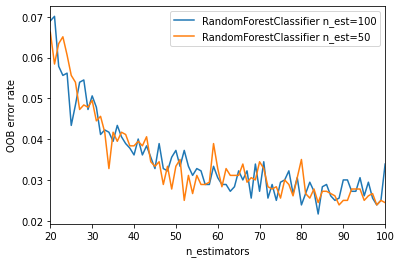

In [41]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [44]:
def get_dependency_and_plot(parameters, param_title=None):
    # parameters: tuple, где первый элемент - название параметра RandomForestClassifier, (например, n_estimators),
    # а второй - диапазон для заданного параметра.
    #
    # param_title: Продолжение фразы 'Зависимость accuracy от ...' из заголовка графика.
    # Опциональный параметр. Если None, то заголовок не оторбражается
    param_name, param_range = parameters
    accuracy_list = []
    # цикл по диапазону параметра:
    for value in param_range:
        # словарь параметров для задания параметров модели через метод set_params()
        param_dict = {param_name: value}
        model = RandomForestClassifier()
        model.set_params(**param_dict)
        # считаем accuracy на кросс-валидации и берём среднее:
        score = cross_val_score(model, X, y, cv=10, n_jobs=-1).mean()
        accuracy_list.append((value, score))
    # отрисовываем график:
    xx = [z[0] for z in accuracy_list]
    yy = [z[1] for z in accuracy_list]
    plt.plot(xx, yy, '.-')
    if param_title != None:
        plt.title('Зависимость accuracy от ' + param_title)
    plt.xlabel(param_name)
    plt.ylabel("Mean accuracy")

In [45]:
n_estimators_range = np.arange(1, 200, 10, dtype=int)
max_features_range = np.arange(5, X.shape[1], 5, dtype=int)
max_depth_range = np.arange(3, 30, 2, dtype=int)
# Также определим пары tuple для работы с определённой выше функцией:
est_tuple = ('n_estimators', n_estimators_range)
max_features_tuple = ('max_features', max_features_range)
max_depth_tuple = ('max_depth', max_depth_range)

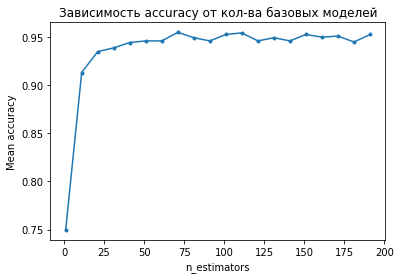

In [46]:
get_dependency_and_plot(est_tuple, 'кол-ва базовых моделей')

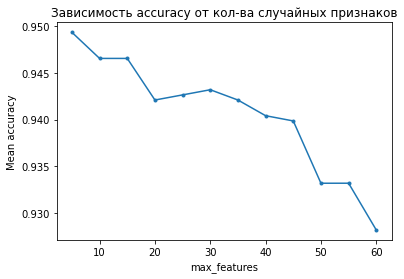

In [47]:
get_dependency_and_plot(max_features_tuple, 'кол-ва случайных признаков')

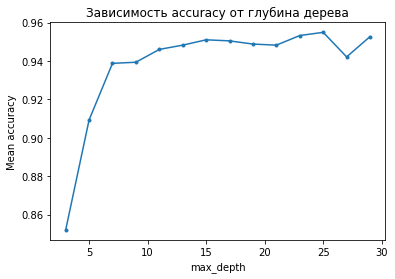

In [48]:
get_dependency_and_plot(max_depth_tuple, 'глубина дерева')